In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#reading the dataset all the respondents who self reported as havin vision difficulty, with specific columns of interest
df = pd.read_csv("psam_pusab_working_data.csv")

In [3]:
#preview what the dataset looks like
df.sample(5)

,Unnamed: 0,Unnamed: 0.1,REGION,DIVISION,ST,AGEP,COW,DEYE,NWAV,NWLA,...,DPHY,HINS4,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,PWGTP
51912,11032,427825,4,9,6,87,NaN,1,5.0,2.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,177
17681,17681,702663,3,7,40,53,1.0,1,1.0,1.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,99
52516,11636,458256,4,9,6,47,NaN,1,5.0,2.0,...,1.0,1,200.0,7200.0,0.0,0.0,0.0,0.0,0.0,291
43223,2343,62347,4,8,4,57,NaN,1,5.0,2.0,...,2.0,2,0.0,0.0,18000.0,0.0,0.0,0.0,0.0,60
48220,7340,235881,4,9,6,82,NaN,1,5.0,2.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33


In [4]:
#an overview of the columns
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'REGION', 'DIVISION', 'ST', 'AGEP', 'COW',
       'DEYE', 'NWAV', 'NWLA', 'NWLK', 'SCH', 'SCHG', 'SCHL', 'SEX', 'WKL',
       'DIS', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'INDP', 'NAICSP', 'OCCP',
       'PERNP', 'PINCP', 'POWSP', 'RAC1P', 'RAC2P', 'RAC3P', 'RACAIAN',
       'RACASN', 'RACBLK', 'RACWHT', 'SCIENGP', 'SCIENGRLP', 'SOCP', 'FDEYEP',
       'ADJINC', 'DDRS', 'DEAR', 'DOUT', 'DPHY', 'HINS4', 'OIP', 'PAP', 'RETP',
       'SEMP', 'SSIP', 'SSP', 'WAGP', 'PWGTP'],
      dtype='object')

In [5]:
# information about the dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82994 entries, 0 to 82993
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    82994 non-null  int64  
 1   Unnamed: 0.1  82994 non-null  int64  
 2   REGION        82994 non-null  int64  
 3   DIVISION      82994 non-null  int64  
 4   ST            82994 non-null  int64  
 5   AGEP          82994 non-null  int64  
 6   COW           30694 non-null  float64
 7   DEYE          82994 non-null  int64  
 8   NWAV          79081 non-null  float64
 9   NWLA          79081 non-null  float64
 10  NWLK          79081 non-null  float64
 11  SCH           82718 non-null  float64
 12  SCHG          7429 non-null   float64
 13  SCHL          82718 non-null  float64
 14  SEX           82994 non-null  int64  
 15  WKL           79081 non-null  float64
 16  DIS           82994 non-null  int64  
 17  ESR           79081 non-null  float64
 18  FOD1P         12786 non-nu

In [6]:
# convert the deye col
deye = {1: 'yes', 2:'no'}
df["DEYE"] = df["DEYE"].map(deye) 

# convert the region col
region = {1: 'Northeast', 2: 'Midwest', 3: 'South', 4: 'West', 9: 'Puerto Rico'}
df["REGION"] = df["REGION"].map(region)

# convert the st col
st = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California', 8: 'Colorado', 9: 'Connecticut',
      10: 'Delaware', 11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois',
      18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
      25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska',
      32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina',
      38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 44: 'Rhode Island',45: 'South Carolina',
      46: 'South Dakota', 47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 53: 'Washington',
      54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming', 72: 'Puerto Rico'}

df["ST"] = df["ST"].map(st) 

# convert division 
division = {0: 'Puerto Rico', 1: 'New England', 2: 'Middle Atlantic', 3: 'East North Central', 4: 'West North Central', 
          5: 'South Atlantic', 6:'East South Central', 7:'West South Central', 8:'Mountain', 9:'Pacific'}
df["DIVISION"] = df["DIVISION"].map(division)
sex = {1: 'Male', 2: 'Female'}
df["SEX"] = df["SEX"].map(sex)

In [7]:
#convert school col
schl = {'bb': 'N/A (less than 3 years old)', 1:'No schooling completed', 
        2:'Nursery school, preschool', 3:'Kindergarten', 4: 'Grade 1',
        5:'Grade 2', 6:'Grade 3', 7:'Grade 4', 8:'Grade 5', 9:'Grade 6',
        10:'Grade 7', 11:'Grade 8', 12:'Grade 9', 13:'Grade 10', 
        14:'Grade 11', 15:'12th grade - no diploma', 
        16:'Regular high school diploma', 17: 'GED or alternative credential',
        18: 'Some college, but less than 1 year', 
        19: '1 or more years of college credit, no degree',20: 'Associates degree',
        21: 'Bachelors degree', 22: 'Masters degree',
        23: 'Professional degree beyond a bachelors degree',24: 'Doctorate degree'}



SyntaxError: EOL while scanning string literal (Temp/ipykernel_28804/947966711.py, line 11)

In [8]:
# droping the unnamed columns that occured after concatanating the dataset.
df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])

,REGION,DIVISION,ST,AGEP,COW,DEYE,NWAV,NWLA,NWLK,SCH,...,DPHY,HINS4,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,PWGTP
0,Midwest,West North Central,Missouri,41,NaN,yes,5.0,3.0,3.0,1.0,...,2.0,1,0.0,0.0,600.0,0.0,0.0,0.0,0.0,61
1,Midwest,West North Central,Missouri,72,NaN,yes,5.0,3.0,3.0,1.0,...,1.0,1,0.0,0.0,0.0,0.0,0.0,8900.0,0.0,107
2,Midwest,West North Central,Missouri,85,NaN,yes,5.0,3.0,3.0,1.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,10800.0,0.0,125
3,Midwest,West North Central,Missouri,85,NaN,yes,5.0,3.0,3.0,1.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,10800.0,0.0,11
4,Midwest,West North Central,Missouri,52,NaN,yes,5.0,2.0,2.0,1.0,...,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82989,South,East South Central,Mississippi,65,NaN,yes,5.0,2.0,2.0,1.0,...,1.0,2,0.0,0.0,6400.0,0.0,0.0,7600.0,0.0,229
82990,South,East South Central,Mississippi,69,NaN,yes,5.0,2.0,2.0,1.0,...,1.0,2,0.0,0.0,0.0,0.0,0.0,13500.0,0.0,221
82991,South,East South Central,Mississippi,49,1.0,yes,1.0,2.0,2.0,1.0,...,2.0,2,0.0,0.0,0.0,0.0,0.0,0.0,45000.0,26
82992,South,East South Central,Mississippi,13,NaN,yes,NaN,NaN,NaN,2.0,...,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37


checking value counts of some variables

In [9]:
df["AGEP"].value_counts()

94    2407
62    1635
72    1630
61    1626
64    1623
      ... 
3      120
2      108
1       91
0       77
96      21
Name: AGEP, Length: 97, dtype: int64

In [10]:
df["SEX"].value_counts()

Female    44780
Male      38214
Name: SEX, dtype: int64

In [11]:
df["ST"].value_counts()

California              8035
Texas                   7776
Florida                 5848
New York                4353
Pennsylvania            3143
Ohio                    3005
Illinois                2953
Georgia                 2825
North Carolina          2732
Michigan                2403
Tennessee               2239
Virginia                2022
Arizona                 1894
New Jersey              1865
Indiana                 1834
Missouri                1817
Washington              1806
Alabama                 1785
Kentucky                1678
Louisiana               1617
Oklahoma                1601
South Carolina          1555
Massachusetts           1416
Maryland                1279
Mississippi             1236
Arkansas                1197
Colorado                1166
Wisconsin               1121
Oregon                  1110
Minnesota                979
Kansas                   861
New Mexico               759
West Virginia            758
Iowa                     755
Connecticut   

In [12]:
df["PINCP"].value_counts()

0.0         8907
12000.0     1570
9000.0       954
10000.0      833
9300.0       796
            ... 
3590.0         1
270800.0       1
277800.0       1
18810.0        1
50090.0        1
Name: PINCP, Length: 4459, dtype: int64

In [13]:
df["WAGP"].value_counts()

0.0         58220
30000.0       667
50000.0       544
40000.0       541
20000.0       526
            ...  
890.0           1
28900.0         1
42900.0         1
428000.0        1
48900.0         1
Name: WAGP, Length: 796, dtype: int64

<AxesSubplot:>

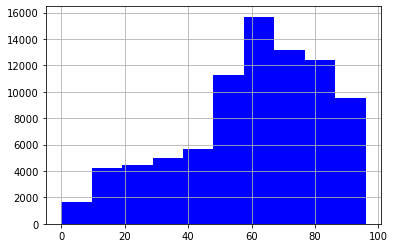

In [14]:
plt.figure()
df["AGEP"].hist(color = "b", bins = 10)

#df["AGEP"].diff().hist(color="g", alpha=0.5, bins=10)

In [15]:
df["AGEP"].describe()

count    82994.000000
mean        60.189158
std         22.626098
min          0.000000
25%         47.000000
50%         63.000000
75%         77.000000
max         96.000000
Name: AGEP, dtype: float64

In [16]:
bins = [0, 18, 30, 40, 50, 60, 70, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AGE_BINS'] = pd.cut(df.AGEP, bins, labels = labels,include_lowest = True)


Text(0.5, 1.0, 'Distribution of the ages')

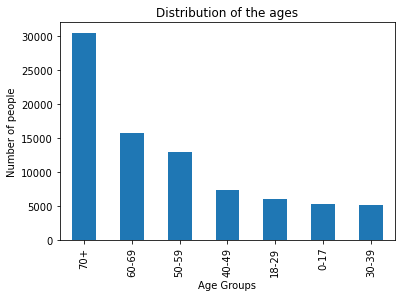

In [17]:
ages = df["AGE_BINS"].value_counts()
ages.sort_index()
ages
ages.plot.bar()
plt.xlabel("Age Groups")
plt.ylabel("Number of people")
plt.title("Distribution of the ages")

In [18]:
gender = df["SEX"].value_counts()

Text(0.5, 1.0, 'Distribution of sex in people with vision difficulty')

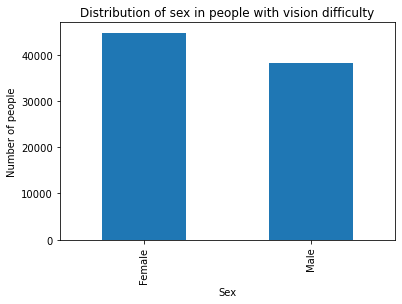

In [19]:
gender.plot.bar()
plt.xlabel("Sex")
plt.ylabel("Number of people")
plt.title("Distribution of sex in people with vision difficulty")

In [20]:
df["PERNP"].value_counts()

 0.0         56255
 30000.0       710
 40000.0       573
 20000.0       571
 50000.0       568
             ...  
 472000.0        1
-1700.0          1
 63600.0         1
 393500.0        1
 48900.0         1
Name: PERNP, Length: 996, dtype: int64

In [21]:
df[["OIP", "PAP", "RETP", "SEMP", "SSIP", "SSP", "WAGP", "PERNP", "PINCP"]].sample(5)

,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,PERNP,PINCP
6448,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,1900.0
17645,0.0,0.0,0.0,0.0,9400.0,780.0,0.0,0.0,10180.0
25988,0.0,0.0,0.0,0.0,3200.0,7300.0,0.0,0.0,10500.0
29992,0.0,0.0,0.0,0.0,0.0,8300.0,0.0,0.0,8300.0
55409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df[["OIP", "PAP", "RETP", "SEMP", "SSIP", "SSP", "WAGP", "PERNP", "PINCP"]].describe()

,OIP,PAP,RETP,SEMP,SSIP,SSP,WAGP,PERNP,PINCP
count,79502.000000,79502.000000,79502.000000,79502.000000,79502.000000,79502.000000,79502.000000,7.908100e+04,7.950200e+04
mean,952.330256,65.716083,4587.807804,830.152122,1052.442706,6747.598425,10613.845035,1.150492e+04,2.727744e+04
std,5559.978775,707.960625,14454.139275,10877.681253,3276.231665,8306.675707,32689.785703,3.522053e+04,4.495340e+04
min,0.000000,0.000000,0.000000,-9600.000000,0.000000,0.000000,0.000000,-8.400000e+03,-7.980000e+03
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,8.000000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,0.000000,0.000000e+00,1.502000e+04
75%,0.000000,0.000000,0.000000,0.000000,0.000000,13000.000000,1800.000000,4.800000e+03,3.200000e+04
max,82000.000000,23900.000000,186000.000000,486000.000000,27400.000000,38700.000000,717000.000000,1.050000e+06,1.353000e+06


#distribution of the income without the na values removed
plt.figure()
df["PINCP"].hist(color = "g", bins = 10)

exploring the total persons income (PINCP) and total person earnings (PERNP) without the n/a values 

In [23]:
#drop the NAN values because its respondants that are less than 16 years old.
df_inc_earnings = df.dropna(subset = ["PERNP"])
#drop the NAN values because its respondants that are less than 15 years old.
df_inc_earnings = df.dropna(subset = ["PINCP"])

In [24]:
df_inc_earnings["PINCP"].value_counts()


0.0         8907
12000.0     1570
9000.0       954
10000.0      833
9300.0       796
            ... 
3590.0         1
270800.0       1
277800.0       1
18810.0        1
50090.0        1
Name: PINCP, Length: 4459, dtype: int64

In [25]:
df_inc_earnings["PERNP"].value_counts()

 0.0         56255
 30000.0       710
 40000.0       573
 20000.0       571
 50000.0       568
             ...  
 472000.0        1
-1700.0          1
 63600.0         1
 393500.0        1
 48900.0         1
Name: PERNP, Length: 996, dtype: int64

In [26]:
df_inc_earnings [["PINCP", "PERNP"]].describe()

,PINCP,PERNP
count,7.950200e+04,7.908100e+04
mean,2.727744e+04,1.150492e+04
std,4.495340e+04,3.522053e+04
min,-7.980000e+03,-8.400000e+03
25%,8.000000e+03,0.000000e+00
50%,1.502000e+04,0.000000e+00
75%,3.200000e+04,4.800000e+03
max,1.353000e+06,1.050000e+06


In [27]:
df_inc_earnings.shape

(79502, 53)

array([[<AxesSubplot:title={'center':'PINCP'}>,
        <AxesSubplot:title={'center':'PERNP'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

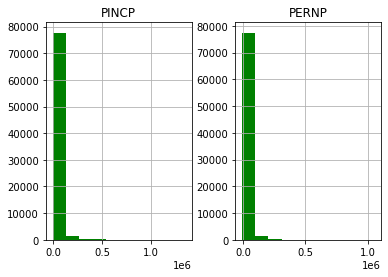

In [28]:
plt.figure()
df_inc_earnings[["PINCP", "PERNP"]].hist(color = "g", bins = 10)

plt.figure()
df_earnings["PERNP"].hist(color = "g", bins = 10)
df_income[["PINCP"]].plot.hist("Total Income")

<AxesSubplot:>

<Figure size 720x1080 with 0 Axes>

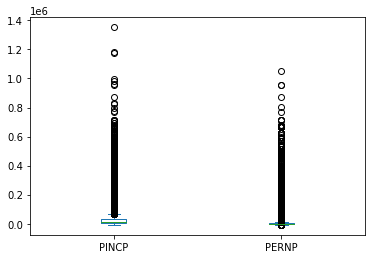

In [29]:
plt.figure(figsize =(10,15))
df_inc_earnings[["PINCP", "PERNP"]].plot.box("Total Income")

In [30]:
df_inc_earnings["ADJINC"].value_counts()

1010145    79502
Name: ADJINC, dtype: int64

In [31]:
#ADJINC annual update of the inflation factor.
#Divide the value in ADJINC by 1,000,000

num = 1000000.00
adjust_fac = (df_inc_earnings["ADJINC"] / num )

In [32]:
adjust_fac

0        1.010145
1        1.010145
2        1.010145
3        1.010145
4        1.010145
           ...   
82988    1.010145
82989    1.010145
82990    1.010145
82991    1.010145
82993    1.010145
Name: ADJINC, Length: 79502, dtype: float64

In [33]:
df_inc_earnings["PERNP"].describe()

count    7.908100e+04
mean     1.150492e+04
std      3.522053e+04
min     -8.400000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      4.800000e+03
max      1.050000e+06
Name: PERNP, dtype: float64

In [34]:
adjusted_earnings = (df_inc_earnings["PERNP"] * adjust_fac)

In [35]:
adjusted_earnings.describe()

count    7.908100e+04
mean     1.162164e+04
std      3.557784e+04
min     -8.485218e+03
25%      0.000000e+00
50%      0.000000e+00
75%      4.848696e+03
max      1.060652e+06
dtype: float64

In [36]:
adjusted_income = (df_inc_earnings["PINCP"] * adjust_fac)
adjusted_income.describe()

count    7.950200e+04
mean     2.755417e+04
std      4.540946e+04
min     -8.060957e+03
25%      8.081160e+03
50%      1.517238e+04
75%      3.232464e+04
max      1.366726e+06
dtype: float64

In [37]:
AD_IN = pd.DataFrame(adjusted_income)
AD_IN['fed_ad'] = np.where(AD_IN[0] > 42269, AD_IN[0] * 0.965, AD_IN[0] * 0.854)
AD_IN

,0,fed_ad
0,606.0870,517.598298
1,8990.2905,7677.708087
2,10909.5660,9316.769364
3,10909.5660,9316.769364
4,0.0000,0.000000
...,...,...
82988,10303.4790,8799.171066
82989,14142.0300,12077.293620
82990,13636.9575,11645.961705
82991,45456.5250,43865.546625


In [38]:
AD_IN['st_lo'] = AD_IN['fed_ad'] * 0.901

In [39]:
AD_IN

,0,fed_ad,st_lo
0,606.0870,517.598298,466.356066
1,8990.2905,7677.708087,6917.614986
2,10909.5660,9316.769364,8394.409197
3,10909.5660,9316.769364,8394.409197
4,0.0000,0.000000,0.000000
...,...,...,...
82988,10303.4790,8799.171066,7928.053130
82989,14142.0300,12077.293620,10881.641552
82990,13636.9575,11645.961705,10493.011496
82991,45456.5250,43865.546625,39522.857509


In [40]:
AD_IN['fed_ad'].describe()

count    7.950200e+04
mean     2.529562e+04
std      4.397202e+04
min     -6.884057e+03
25%      6.901311e+03
50%      1.295721e+04
75%      2.760524e+04
max      1.318891e+06
Name: fed_ad, dtype: float64

In [41]:
AD_IN['st_lo'].describe()

count    7.950200e+04
mean     2.279136e+04
std      3.961879e+04
min     -6.202536e+03
25%      6.218081e+03
50%      1.167445e+04
75%      2.487232e+04
max      1.188321e+06
Name: st_lo, dtype: float64

In [42]:
total_dis = AD_IN['st_lo'].sum()
total_dis

1811958494.822867

In [43]:
df_inc_earnings["PWGTP"] 

0         61
1        107
2        125
3         11
4          9
        ... 
82988    114
82989    229
82990    221
82991     26
82993     60
Name: PWGTP, Length: 79502, dtype: int64

In [44]:
pop_disp_inc = df_inc_earnings["PWGTP"] * AD_IN['st_lo']

In [45]:
pop_disp_inc 

0        2.844772e+04
1        7.401848e+05
2        1.049301e+06
3        9.233850e+04
4        0.000000e+00
             ...     
82988    9.037981e+05
82989    2.491896e+06
82990    2.318956e+06
82991    1.027594e+06
82993    0.000000e+00
Length: 79502, dtype: float64

In [51]:
low_vision_DI = pop_disp_inc.sum()
low_vision_DI

166460013499.64987

In [53]:
Online_Shop_amt = low_vision_DI * .25
Online_Shop_amt

41615003374.91247

In [ ]:
plt.figure(figsize = (10,15))
adjusted_income.plot.box()
plt.title("Adjusted total Income Distribution")
plt.ylabel("income" )

In [ ]:
df_inc_earnings["PWGTP"]

In [ ]:
df["OCCP"].value_counts()

In [ ]:
sns.boxplot(x = "AGE_BINS", y='PINCP', data = df_income)
plt.title("Boxplot of Age vs. Total income")

In [ ]:
plt.figure(figsize = (10,15))
sns.boxplot(x = "SEX", y='PINCP', data = df_income)
plt.title("Boxplot of SEX vs. Total income")

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(x='AGE_BINS',y='PINCP',data=df)
plt.title("Age by Total Income of the vision impaired")
plt.xlabel("Age")
plt.ylabel("income")

In [ ]:
df["ADJINC"].head(5)

In [ ]:
df["AD_INCOME"].describe()

In [ ]:
df.columns

In [ ]:
df["POP_EST"] = (df["AD_INCOME"] * df["PWGTP"])

In [ ]:
plt.figure(figsize = (10,15))
sns.boxplot(x = "SEX", y='AD_INCOME', data = df)
plt.title("Boxplot of SEX vs. Adjusted Total income")

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DEYE',y='AGEP',data=df_new)
plt.title("Age by vision difficulty")
plt.xlabel("Presence of vision difficulty")
plt.ylabel("Age")